In [1]:
#使用sf读取wav文件
import soundfile as sf
# 指定要读取的wav文件路径
file_path = './examples/default.wav'
# 使用soundfile库读取wav文件
data, samplerate = sf.read(file_path)
# data是一个numpy数组，包含了音频数据的采样值
# samplerate是采样率，即每秒的采样数
# 打印一些基本信息
print(f'音频数据 shape: {data.shape}')
print(f'采样率: {samplerate} Hz')
# 采样点数 199228，采样率44100，采样周期1/44100，采样时长为199228/44100
# 对上面的波文件进行离散傅里叶变换。
# 目前来看，要想用这个离散傅里叶变换理论，频域采样点数也需要为N，但是我们肯定不能这样做。只能固定的做。
# 加个掩码，时长选择为1000
# 每分钟160-170个字

音频数据 shape: (117786,)
采样率: 44100 Hz


In [5]:
import requests
import base64
import numpy as np
import librosa
import soundfile as sf

# 定义请求的URL
url = "http://172.28.4.42:8000/tts"

# 定义请求的数据
request_data = {
    "text": "本书是作家田耳一本深入历史与江湖缝隙的奇书，作者踏访时代模糊不清的残影，揭秘武侠黑书江湖，重现一段前后跨越几十年、令人唏嘘不已的往事。本书也是一本收获自我的成长小说，作者致力描摹大多数普通人的日常生活，着力书写理想与现实的抗衡、矛盾自我的斗争，力图还原生活的本来面目和人性的复杂与丰盈。",
    "uri": "ws://172.28.4.42:80/stream/tts"
}
import time
# 发送POST请求
start = time.time()
response = requests.post(url, json=request_data)
print(response.json())
end = time.time()
print(end-start)
# cpu 143个字
35.231178
# gpu

{'message': 'Request received, processing in background.'}
0.11582088470458984


35.231178

In [7]:
import base64
import wave
import io
import numpy as np

# 读取 base64 编码的音频文件
voice_file_path = './examples/default.wav'

with open(voice_file_path, 'rb') as f:
    encoded_audio_data = f.read()

# 解码 base64 数据
decoded_audio_data = base64.b64decode(encoded_audio_data)

# 使用 io.BytesIO 将字节数据转换为字节流，以便 wave 模块读取
audio_stream = io.BytesIO(decoded_audio_data)

# 读取 WAV 文件
with wave.open(audio_stream, 'rb') as wav_file:
    n_channels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    
    # 读取音频数据
    audio_frames = wav_file.readframes(n_frames)

    # 将字节数据转换为 numpy 数组
    if sampwidth == 1:
        dtype = np.uint8  # 8-bit PCM
    elif sampwidth == 2:
        dtype = np.int16  # 16-bit PCM
    else:
        raise ValueError("Unsupported sample width: {}".format(sampwidth))
    
    audio_data = np.frombuffer(audio_frames, dtype=dtype)

    # 如果音频是多通道的，需要进行重构
    if n_channels > 1:
        audio_data = audio_data.reshape(-1, n_channels)

# 打印音频信息
print(f"Channels: {n_channels}")
print(f"Sample width: {sampwidth} bytes")
print(f"Frame rate: {framerate} Hz")
print(f"Number of frames: {n_frames}")
print(f"Audio data shape: {audio_data.shape}")
print(f"Audio data: {audio_data[:10]}")  # 打印前10个样本


Error: file does not start with RIFF id

In [3]:
temp = np.frombuffer(decoded_bytes, dtype=np.float32)
temp

array([ 1.7409115e+20,  7.3024153e-10, -5.3084462e-25], dtype=float32)

In [ ]:

# 尝试不同的数据类型和形状
possible_dtypes = [np.int16, np.float32]  # 你可以根据具体情况增加更多可能的类型
possible_shapes = [(len(decoded_bytes) // np.dtype(dtype).itemsize,)]  # 假设一维数组

# 尝试每一种可能的数据类型和形状
for dtype in possible_dtypes:
    for shape in possible_shapes:
        try:
            data = np.frombuffer(decoded_bytes, dtype=dtype).reshape(shape)
            print(f"Decoded data with dtype={dtype} and shape={shape}:\n", data)
        except Exception as e:
            print(f"Failed to decode with dtype={dtype} and shape={shape}: {e}")

# 根据解码结果选择合理的数据类型和形状

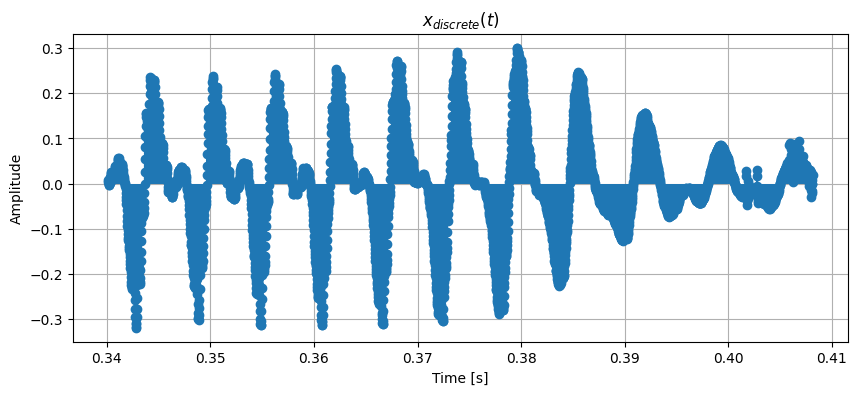

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# 绘制频谱图
# 示例输入信号，假设为正弦波
freq = samplerate
T = 1 / freq  # 采样周期
L = len(data)/freq  # 信号长度为1秒
N = len(data)  # 采样点数量)
t = np.array(list(range(len(data))))*T
x_t = data
# 绘制时间域信号 x_discrete(t)
plt.figure(figsize=(10, 4))
#plt.plot(t[0:30], x_t[0:30])
plt.stem(t[15000:18000], x_t[15000:18000], basefmt=" ")
plt.title('$x_{discrete}(t)$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# 神经网络近似频率预设
1.可以设置神经网络中的频率为预设的

2.采样时间为T时，神经网络中的最高频率为1/T

3.然后根据采样的点数，确定其他频率为1/T/n

In [3]:

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
t = np.array(list(range(len(data))))*T
x_t = data
x = t.reshape(-1,1).astype(np.float32)
y = x_t.reshape(-1,1).astype(np.float32)
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)
# 定义模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        max_freq = 12000
        nums = 100
        self.an = nn.Parameter(torch.randn(nums,1))
        self.bn = nn.Parameter(torch.randn(nums,1))
        self.a0 = nn.Parameter(torch.randn(1))
        #omega采用固定的，与音波的时间长度有关
        #也可以采用不固定的，
        self.omega = max_freq/torch.tensor(list(range(1,nums+1)),dtype=torch.float).reshape(1,-1)
        #每个频率一个衰减系数
        self.alpha = self.omega/10000
        self.start_time = nn.Parameter(torch.randn(1))
    def forward(self, t):
        result = torch.sign(t-self.start_time)*(self.a0+torch.exp(-(t-self.start_time)@self.alpha)*torch.cos(t@self.omega)@self.an+torch.exp(-(t-self.start_time)@self.alpha)*torch.sin(t@self.omega)@self.bn)
        return result
#n个词使用n个网络近似
class Word_Voice():
    def __init__(self):
        self.word = 13
        self.net = {i:SimpleNN() for i in range(self.word)}
    def forward(self, t):
        out = 0
        for i in range(self.word):
            out += self.net[i].forward(t)
        return out

Epoch [10/500], Loss: 627.5822
Epoch [20/500], Loss: 344.6700
Epoch [30/500], Loss: 211.8964
Epoch [40/500], Loss: 147.6794
Epoch [50/500], Loss: 106.6426
Epoch [60/500], Loss: 80.8422
Epoch [70/500], Loss: 54.6700
Epoch [80/500], Loss: 40.8395
Epoch [90/500], Loss: 30.1006
Epoch [100/500], Loss: 24.6158
Epoch [110/500], Loss: 18.6731
Epoch [120/500], Loss: 14.3639
Epoch [130/500], Loss: 11.2082
Epoch [140/500], Loss: 10.3853
Epoch [150/500], Loss: 8.7939
Epoch [160/500], Loss: 6.9533
Epoch [170/500], Loss: 5.7505
Epoch [180/500], Loss: 4.7780
Epoch [190/500], Loss: 3.8981
Epoch [200/500], Loss: 3.2566
Epoch [210/500], Loss: 2.7444
Epoch [220/500], Loss: 2.3215
Epoch [230/500], Loss: 2.0251
Epoch [240/500], Loss: 1.8543
Epoch [250/500], Loss: 1.6627
Epoch [260/500], Loss: 1.4111
Epoch [270/500], Loss: 1.2321
Epoch [280/500], Loss: 1.1797
Epoch [290/500], Loss: 1.1561
Epoch [300/500], Loss: 1.0896
Epoch [310/500], Loss: 0.9531
Epoch [320/500], Loss: 0.8052
Epoch [330/500], Loss: 0.7154


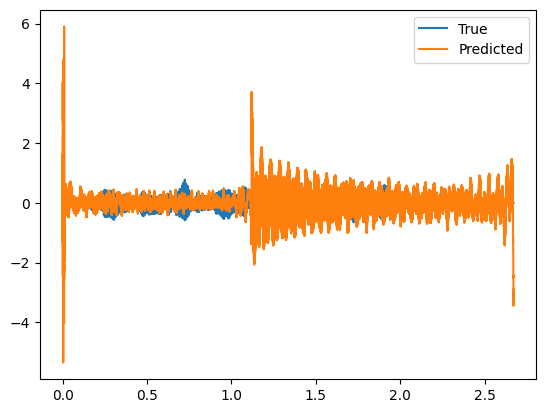

In [4]:
model = Word_Voice()
criterion = nn.MSELoss()
optimizers = [optim.Adam(model.net[i].parameters(), lr=0.01) for i in range(model.word)]
# 训练模型
for i in range(model.word):
    model.net[i].train()
num_epochs = 500
for epoch in range(num_epochs):
    for optimizer in optimizers:
        optimizer.zero_grad()
    outputs = model.forward(x_tensor)
    loss = criterion(outputs, y_tensor)
    #loss += torch.sum(torch.relu(model.omega[:, :-1] - model.omega[:, 1:]))
    #loss += torch.sum(torch.relu(-model.omega))
    loss.backward()
    for optimizer in optimizers:
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
# 预测
for i in range(model.word):
    model.net[i].eval()
predicted = model.forward(x_tensor).detach().numpy()
# 绘制结果
plt.plot(x, y, label='True')
plt.plot(x, predicted, label='Predicted')
plt.legend()
plt.show()
#for key in model.parameters():
#    print(key)

In [5]:
for i in range(model.word):
    model.net[i].train()
num_epochs = 1000
for epoch in range(num_epochs):
    for optimizer in optimizers:
        optimizer.zero_grad()
    outputs = model.forward(x_tensor)
    loss = criterion(outputs, y_tensor)
    #loss += torch.sum(torch.relu(model.omega[:, :-1] - model.omega[:, 1:]))
    #loss += torch.sum(torch.relu(-model.omega))
    loss.backward()
    for optimizer in optimizers:
        optimizer.step()
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [20/1000], Loss: 0.1679
Epoch [40/1000], Loss: 0.1472
Epoch [60/1000], Loss: 0.1360
Epoch [80/1000], Loss: 0.1236
Epoch [100/1000], Loss: 0.1111
Epoch [120/1000], Loss: 0.1045
Epoch [140/1000], Loss: 0.1055
Epoch [160/1000], Loss: 0.1054
Epoch [180/1000], Loss: 0.1006
Epoch [200/1000], Loss: 0.0931
Epoch [220/1000], Loss: 0.0869
Epoch [240/1000], Loss: 0.0845
Epoch [260/1000], Loss: 0.0842
Epoch [280/1000], Loss: 0.0851
Epoch [300/1000], Loss: 0.0853
Epoch [320/1000], Loss: 0.0810
Epoch [340/1000], Loss: 0.0754
Epoch [360/1000], Loss: 0.0696
Epoch [380/1000], Loss: 0.0634
Epoch [400/1000], Loss: 0.0983
Epoch [420/1000], Loss: 0.0689
Epoch [440/1000], Loss: 0.0558
Epoch [460/1000], Loss: 0.0508
Epoch [480/1000], Loss: 0.0471
Epoch [500/1000], Loss: 0.0438
Epoch [520/1000], Loss: 0.0412
Epoch [540/1000], Loss: 0.0385
Epoch [560/1000], Loss: 0.0366
Epoch [580/1000], Loss: 0.0348
Epoch [600/1000], Loss: 0.0327
Epoch [620/1000], Loss: 0.0310
Epoch [640/1000], Loss: 0.0293
Epoch [660/1

Epoch [100/2000], Loss: 20.3272
Epoch [200/2000], Loss: 4.3253
Epoch [300/2000], Loss: 0.8400
Epoch [400/2000], Loss: 0.1450
Epoch [500/2000], Loss: 0.0237
Epoch [600/2000], Loss: 0.0053
Epoch [700/2000], Loss: 0.0029
Epoch [800/2000], Loss: 0.0026
Epoch [900/2000], Loss: 0.0026
Epoch [1000/2000], Loss: 0.0026
Epoch [1100/2000], Loss: 0.0026
Epoch [1200/2000], Loss: 0.0026
Epoch [1300/2000], Loss: 0.0026
Epoch [1400/2000], Loss: 0.0026
Epoch [1500/2000], Loss: 0.0026
Epoch [1600/2000], Loss: 0.0026
Epoch [1700/2000], Loss: 0.0026
Epoch [1800/2000], Loss: 0.0026
Epoch [1900/2000], Loss: 0.0026
Epoch [2000/2000], Loss: 0.0026


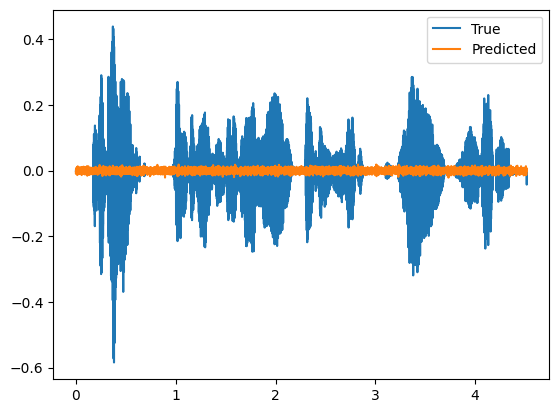

In [5]:
# 初始化模型、损失函数和优化器
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# 训练模型
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    #loss += torch.sum(torch.relu(model.omega[:, :-1] - model.omega[:, 1:]))
    #loss += torch.sum(torch.relu(-model.omega))
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
# 预测
model.eval()
predicted = model(x_tensor).detach().numpy()
# 绘制结果
plt.plot(x, y, label='True')
plt.plot(x, predicted, label='Predicted')
plt.legend()
plt.show()
#for key in model.parameters():
#    print(key)

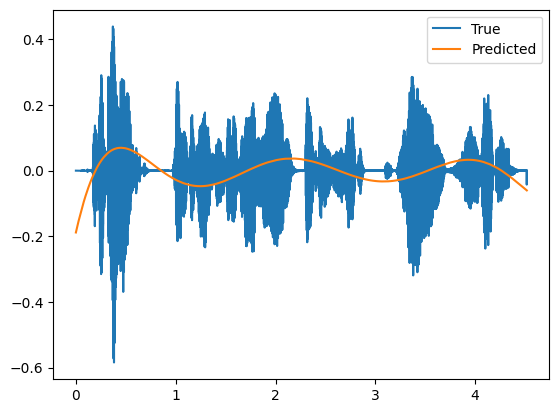

In [7]:
plt.plot(x, y, label='True')
plt.plot(x, predicted, label='Predicted')
plt.legend()
plt.show()

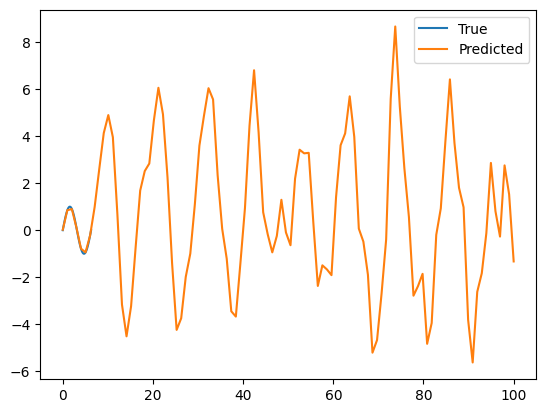

In [13]:
test_tensor = np.linspace(0, 100, 100).reshape(-1, 1).astype(np.float32)
test_predicted = model(torch.from_numpy(test_tensor)).detach().numpy()
# 绘制结果
plt.plot(x, y, label='True')
plt.plot(test_tensor, test_predicted, label='Predicted')
plt.legend()
plt.show()

In [9]:
model.omega.detach()[:, :-1],model.omega.detach()[:, 1:]

(tensor([[-1.3498,  0.1205, -0.8439, -0.4700,  1.2532,  1.0399, -0.7200,  0.4480,
           1.5024]]),
 tensor([[ 0.1205, -0.8439, -0.4700,  1.2532,  1.0399, -0.7200,  0.4480,  1.5024,
           0.3657]]))

In [8]:
print(model.an.detach())

tensor([[-0.7392],
        [ 1.3810],
        [-1.0446],
        [ 0.0852],
        [ 0.7834],
        [-1.0446],
        [-0.2551],
        [-0.6661],
        [ 0.7324],
        [ 0.7331]])


In [6]:
print(model.an.item())

Parameter containing:
tensor([[-0.7392],
        [ 1.3810],
        [-1.0446],
        [ 0.0852],
        [ 0.7834],
        [-1.0446],
        [-0.2551],
        [-0.6661],
        [ 0.7324],
        [ 0.7331]], requires_grad=True)
Parameter containing:
tensor([[-2.1338],
        [-0.2668],
        [-0.6162],
        [ 0.5016],
        [-0.4996],
        [ 1.1293],
        [ 1.1325],
        [-0.1476],
        [-0.8866],
        [-1.4121]], requires_grad=True)
Parameter containing:
tensor([0.0241], requires_grad=True)
Parameter containing:
tensor([[-1.3498,  0.1205, -0.8439, -0.4700,  1.2532,  1.0399, -0.7200,  0.4480,
          1.5024,  0.3657]], requires_grad=True)


In [ ]:
# 用pinn的近似效果应该是最好的
# 但是我还没做实验
# 频率均匀采样的效果也还是可以的。但是采样点数必须要大才行，不然绝对不行。
# 但是这跟我的出发点又违背了，我就是希望用尽可能少的参数来描述这个曲线。
# 同时使考虑时间戳的描述

Epoch [50/500], Loss: 0.1992
Epoch [100/500], Loss: 0.1457
Epoch [150/500], Loss: 0.1240
Epoch [200/500], Loss: 0.0847
Epoch [250/500], Loss: 0.0139
Epoch [300/500], Loss: 0.0042
Epoch [350/500], Loss: 0.0022
Epoch [400/500], Loss: 0.0016
Epoch [450/500], Loss: 0.0009
Epoch [500/500], Loss: 0.0014


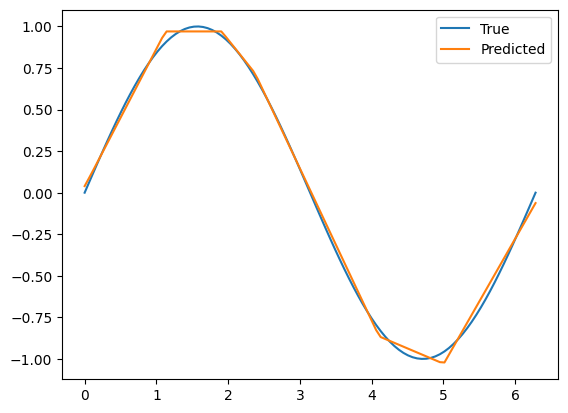

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成数据
x = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1).astype(np.float32)
y = np.sin(x).reshape(-1, 1).astype(np.float32)

# 转换为 PyTorch 张量
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# 定义模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# 初始化模型、损失函数和优化器
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 预测
model.eval()
predicted = model(x_tensor).detach().numpy()

# 绘制结果
plt.plot(x, y, label='True')
plt.plot(x, predicted, label='Predicted')
plt.legend()
plt.show()

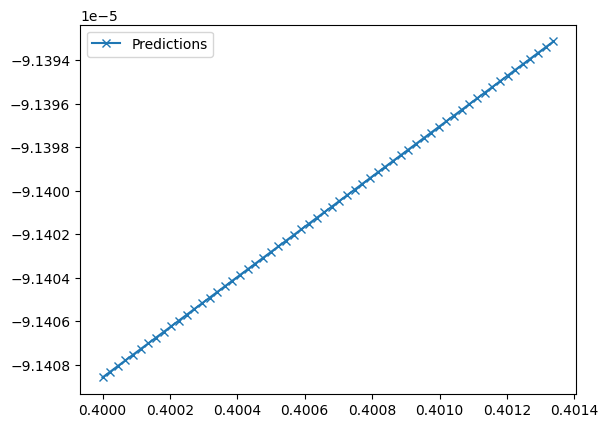

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 时间和数据
time = t.reshape(-1,1)
data = x_t.reshape(-1,1)

# 创建线性回归模型
model = LinearRegression()
model.fit(time, data)

# 预测
future_time = np.array(t[17640:17700]).reshape(-1, 1)
predictions = model.predict(future_time)

# 绘制结果
#plt.plot(time, data, label='Original Data', marker='o')
plt.plot(future_time, predictions, label='Predictions', marker='x')
plt.legend()
plt.show()

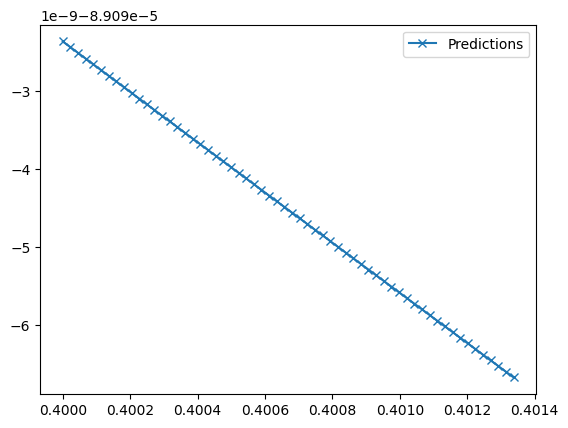

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# 时间和数据
time = t
data = x_t

# 创建样条回归模型
spl = UnivariateSpline(time, data)

# 预测未来值
future_time = np.array(t[17640:17700])
predictions = spl(future_time)

# 绘制结果
#plt.plot(time, data, label='Original Data', marker='o')
plt.plot(future_time, predictions, label='Predictions', marker='x')
plt.legend()
plt.show()

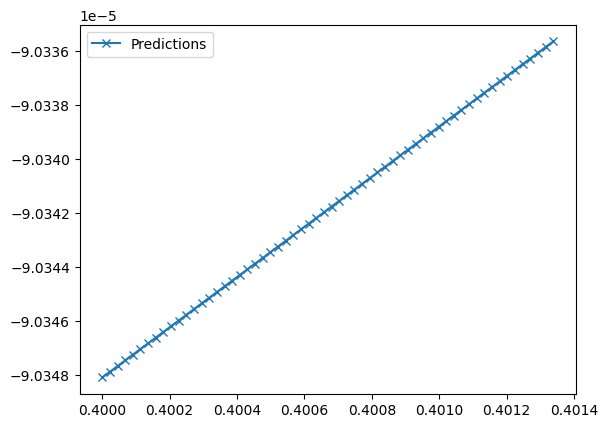

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 时间和数据
time = t
data = x_t
# 创建 DataFrame
df = pd.DataFrame({'time': time, 'data': data})

# 添加时间的多项式特征
df['time_squared'] = df['time'] ** 2

# 使用 OLS 回归模型
X = sm.add_constant(df[['time', 'time_squared']])
y = df['data']
model = sm.OLS(y, X).fit()

# 预测
future_time = np.array(t[17640:17700])
future_df = pd.DataFrame({'time': future_time})
future_df['time_squared'] = future_df['time'] ** 2
X_future = sm.add_constant(future_df)
predictions = model.predict(X_future)

# 绘制结果
#plt.plot(time, data, label='Original Data', marker='o')
plt.plot(future_time, predictions, label='Predictions', marker='x')
plt.legend()
plt.show()

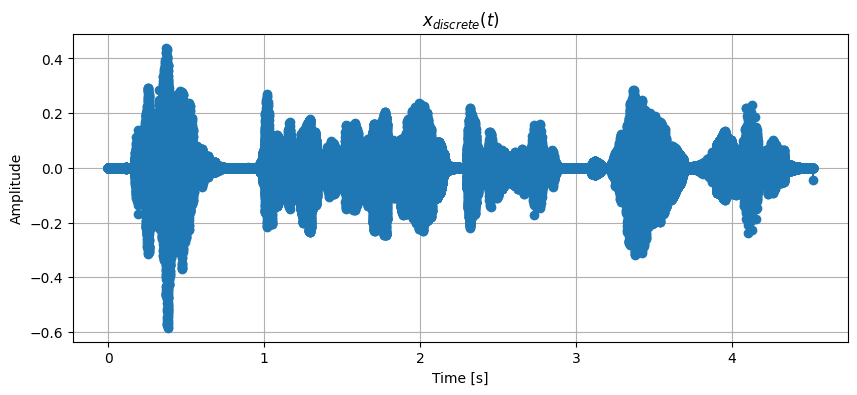

In [10]:
# 绘制时间域信号 x_discrete(t)
plt.figure(figsize=(10, 4))
#plt.plot(t[0:30], x_t[0:30])
plt.stem(t, x_t, basefmt=" ")
plt.title('$x_{discrete}(t)$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# 区间内等间隔采样好

In [43]:
def plot_nums(t,N,freq,T,x_t,nums,path,df):
    #print(t,N,freq,T,x_t,nums,path)
    num_points = int(N/nums)
    sample_hz=np.linspace(0, freq/4, num_points)
    #sample_hz=np.arange(0, freq/4, freq/N)
    #sample_hz=sample_hz[:num_points]
    #print("hz:",sample_hz[0:3])
    sample_freq = 2*np.pi*sample_hz
    #print("freq:",sample_freq[0:3])
    F_omega_a = [(np.cos(ome*T*np.array(list(range(N))))*x_t).sum() for ome in sample_freq]
    F_omega_b = [(np.sin(ome*T*np.array(list(range(N))))*x_t).sum() for ome in sample_freq]
    plt.figure(figsize=(10, 4))
    plt.stem(sample_freq, F_omega_a, basefmt=" ")
    plt.title('$x_{discrete}(t)$')
    plt.xlabel('freq [rad]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.savefig(f'{path}_Aomega_plot_{nums}.png', dpi=300, bbox_inches='tight')
    plt.show()
    # 从上面的频率中合成音频
    #[2*value[1]*np.cos(value[0]*t)+2*value[2]*np.sin(value[0]*t) for value in list(zip(sample_freq,F_omega_a,F_omega_b))]
    pre=0
    i=0
    for value in list(zip(sample_freq,F_omega_a,F_omega_b)):
        #print(value)
        pre += (2*value[1]*np.cos(value[0]*t)+2*value[2]*np.sin(value[0]*t))*df
        #if i >4:
        #    break
        #i += 1
    # 绘制时间域信号 x_discrete(t)
    plt.figure(figsize=(10, 4))
    #plt.plot(t[0:30], x_t[0:30])
    plt.stem(t[17640:17700], pre[17640:17700], basefmt=" ")
    plt.title('$x_{discrete}(t)$')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.savefig(f'{path}_signal_plot_{nums}.png', dpi=300, bbox_inches='tight')
    plt.show()

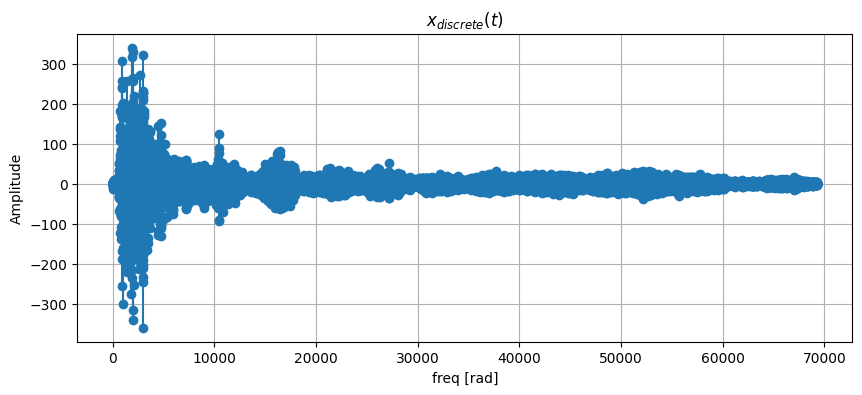

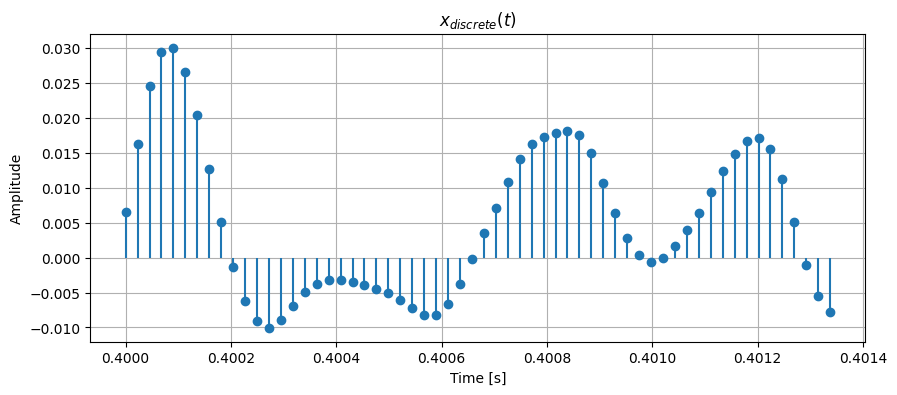

In [36]:
tot = 100*10000
plot_nums(t,N,freq,T,x_t,10,'debug2',1/(N/freq)/100000)

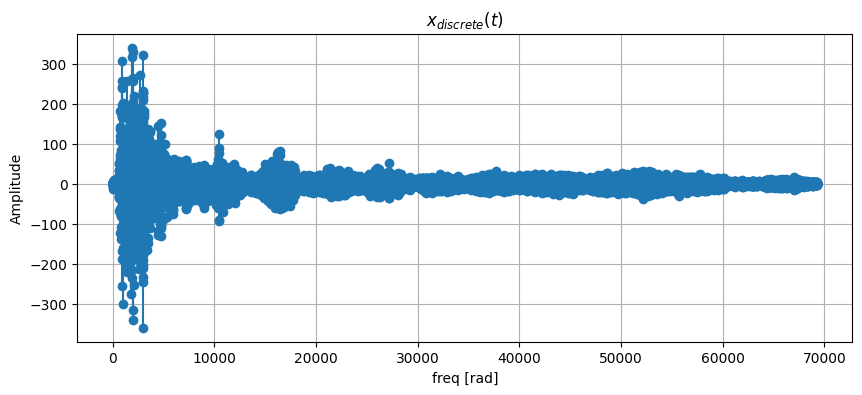

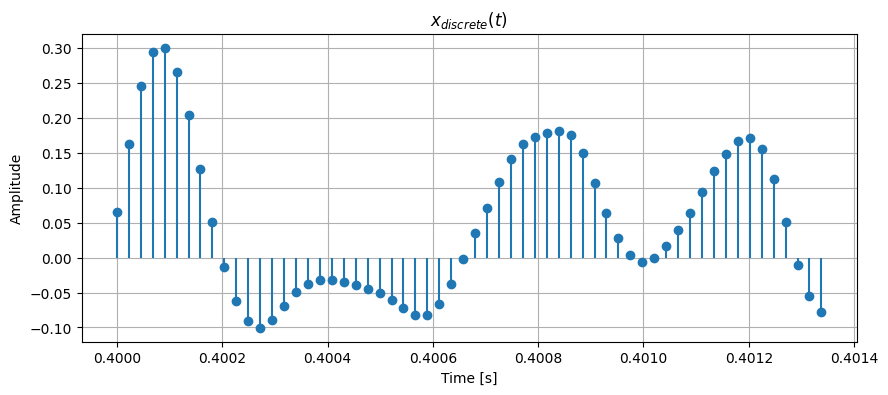

In [37]:
plot_nums(t,N,freq,T,x_t,10,'debug2',1/(N/freq)/10000)

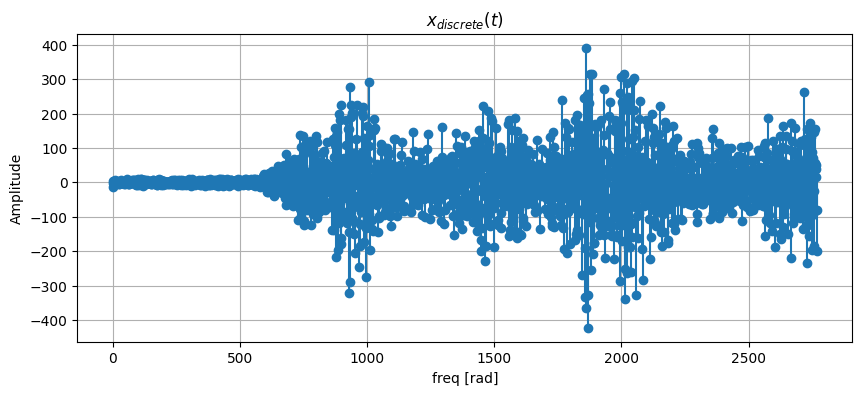

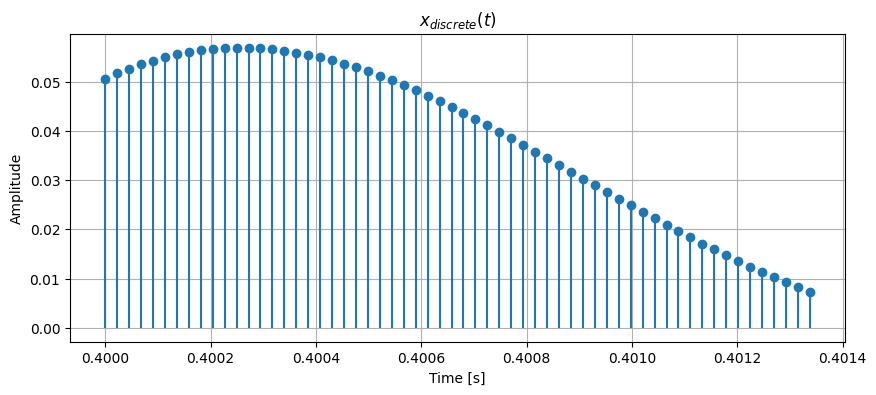

In [44]:
plot_nums(t,N,freq,T,x_t,100,'debug2',1/N)

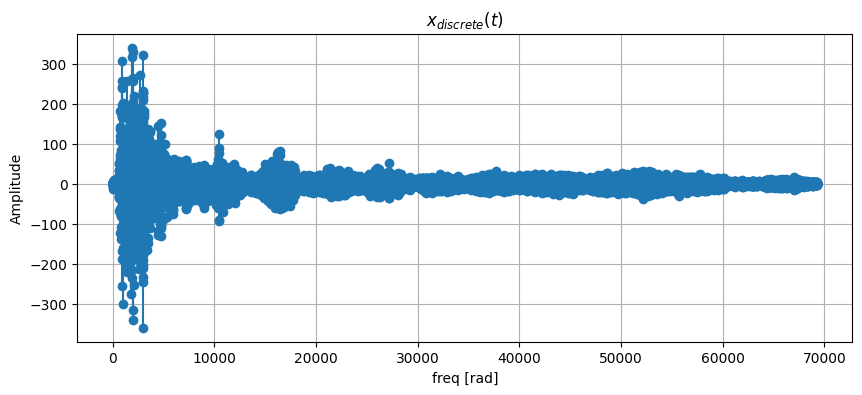

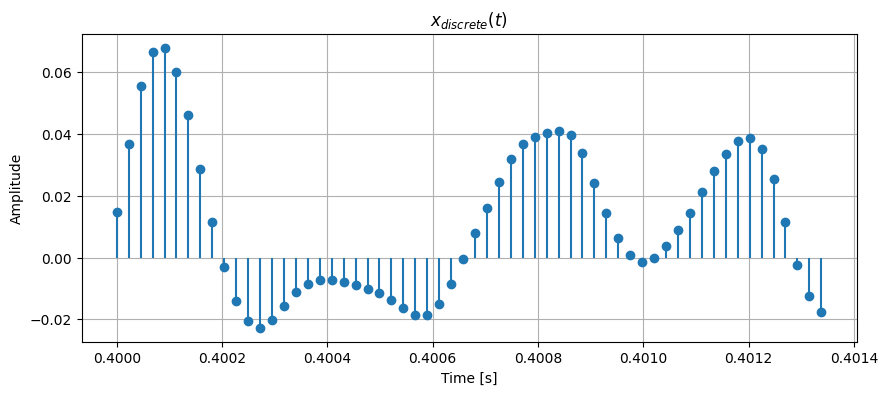

In [40]:
plot_nums(t,N,freq,T,x_t,10,'debug2',1/N)

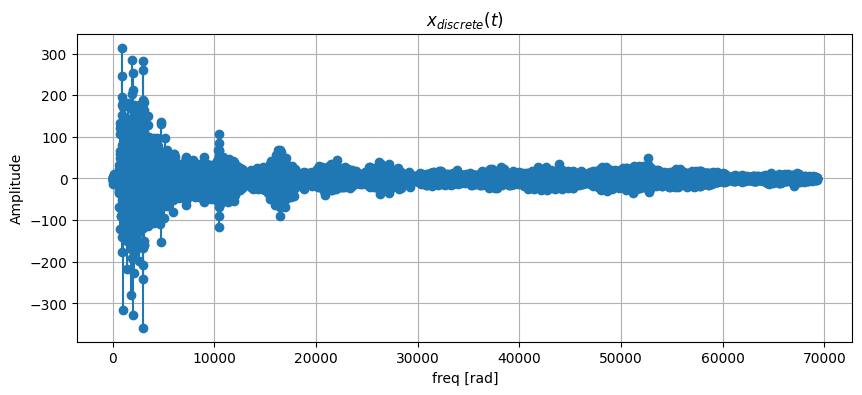

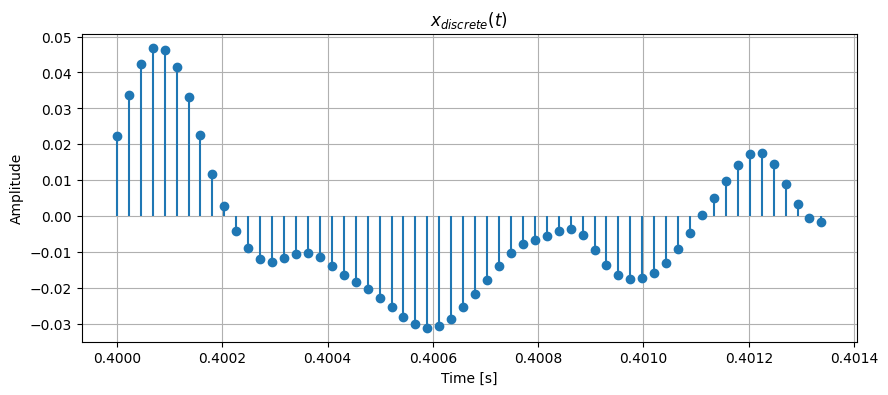

In [41]:
plot_nums(t,N,freq,T,x_t,20,'debug2',1/N)

In [ ]:
nums = [1000,500,250,100,50,25,10,5]
mins = [1000,2000,4000,10000,20000,40000,100000,200000]

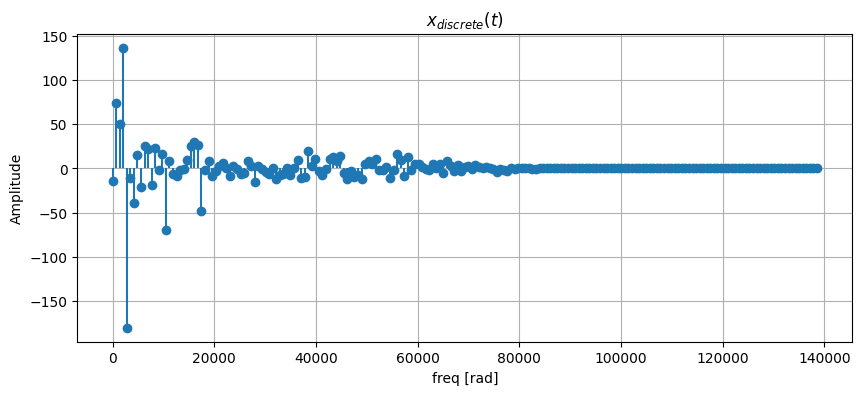

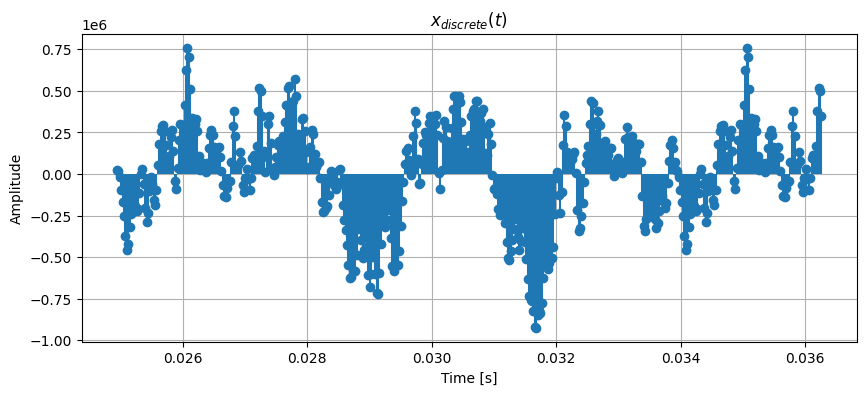

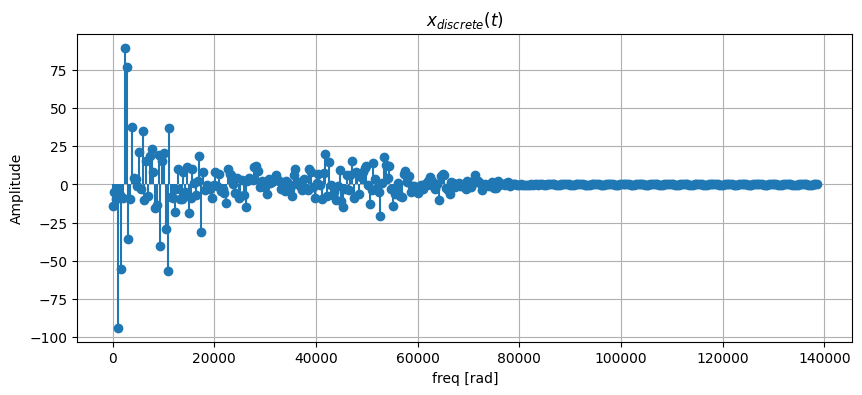

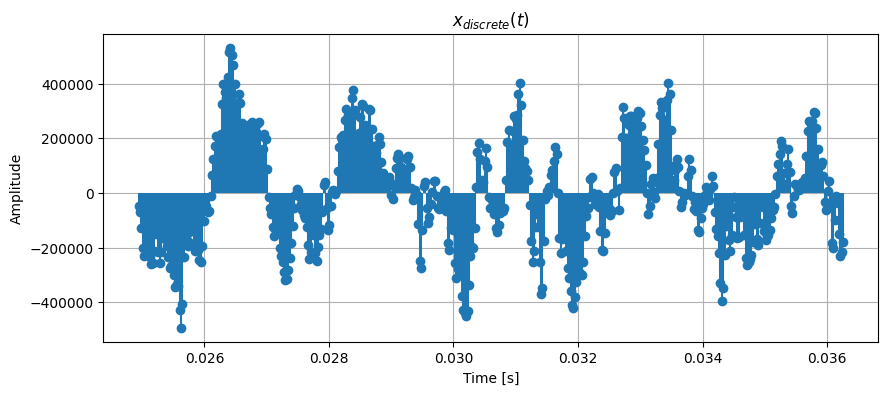

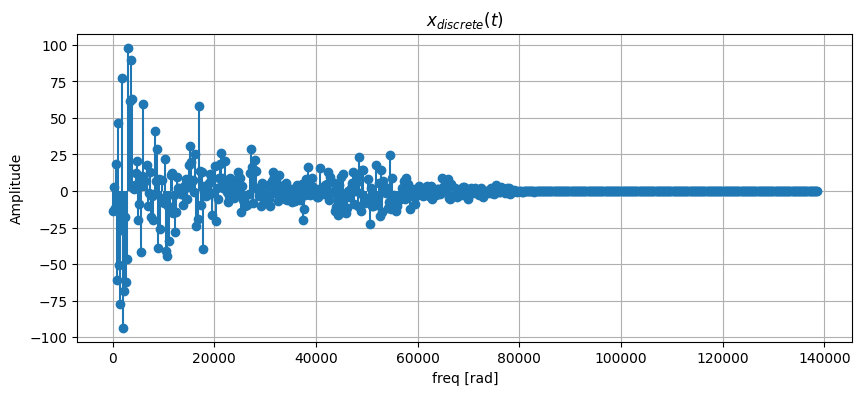

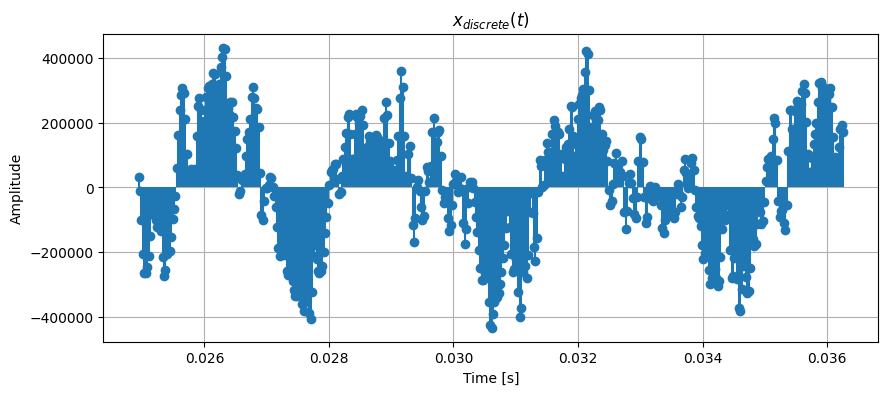

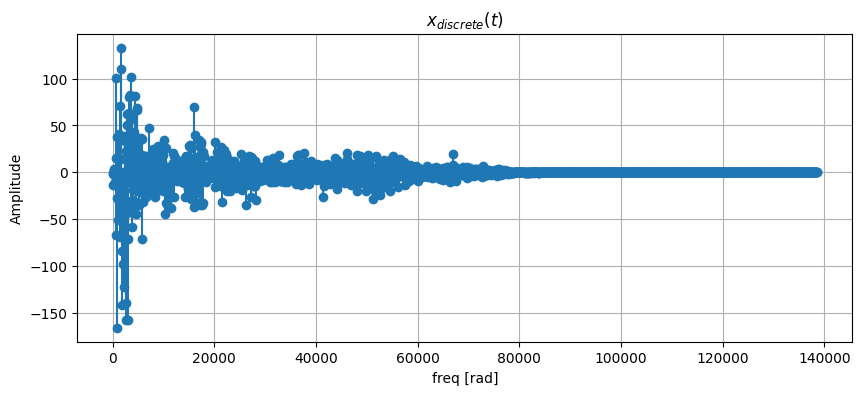

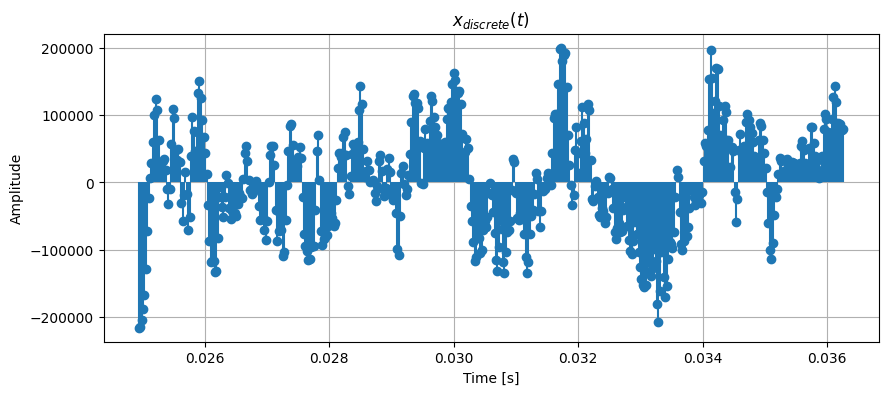

In [11]:
for nums in [1000,500,300,100,50,25]:
    plot_nums(t,N,freq,T,x_t,nums,'sequen')

In [ ]:
import threading
import concurrent.futures
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    # 提交任务并收集 future 对象
    futures = [executor.submit(plot_nums,t,N,freq,T,x_t,nums,'exec') for nums in [1000,500,300,100]]
    # 等待所有 future 完成，并获取结果
    for future in concurrent.futures.as_completed(futures):
        result = future.result()
        print(f'Result: {result}')


hz: [0.         0.22135443 0.44270886]
freq: [0.         1.39081089 2.78162178]


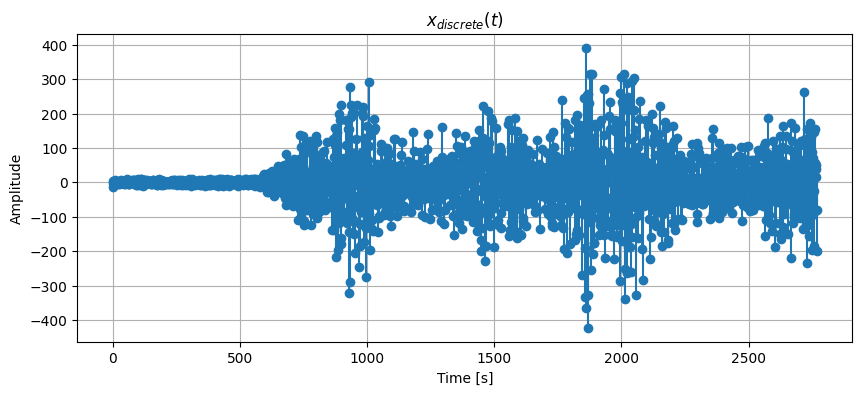

In [8]:
## 第一种采样为低频采样，只采低频
# 采样频率 赫兹
test_hz=np.array(list(range(int(N/100))))/L
print("hz:",test_hz[0:3])
# 采样频率 弧度omega
test_freq = 2*np.pi*test_hz
print("freq:",test_freq[0:3])
## 第二种采样方式为从等间隔均匀采样，低频高频都有涉及
#先看第一种吧
#x_t range(N) T
test_F_omega_a = [(np.cos(ome*T*np.array(list(range(N))))*x_t).sum() for ome in test_freq]
#F_omega_b = [(np.sin(ome*T*np.array(list(range(N))))*x_t).sum() for ome in sample_freq]
# 绘制时间域信号 x_discrete(t)
plt.figure(figsize=(10, 4))
#plt.plot(t[0:30], x_t[0:30])
plt.stem(test_freq, test_F_omega_a, basefmt=" ")
plt.title('$x_{discrete}(t)$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [ ]:
# 你要想用他们的结论，就需要走他们的路
# 如果你想走自己的路，就要自己发现结论